# <6장 차원 축소>

# 02 PCA (Principal Component Analysis) 주성분 분석

## 예제 - Iris 붓꽃 데이터 PCA 시각화

In [2]:
# 라이브러리 불러오기
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 로드 및 DataFrame 변환
iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 원본 데이터 시각화

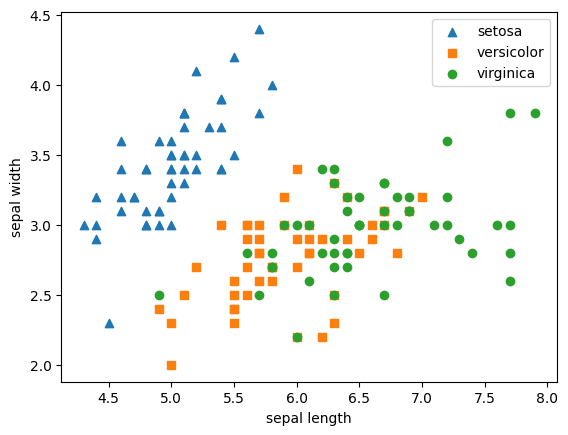

In [3]:
#setosa는 세모 / versicolor는 네모 / virginica는 동그라미 표현
markers = ['^', 's', 'o']

#setosa의 target은 0, versicolor는 1, virginica는 2 각 target별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### PCA 변환

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. 표준화
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

# 2. PCA 수행 (4 → 2차원)
pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환 (동시에 가능)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


### PCA 결과 DataFrame 생성

In [8]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2'] # 2차원
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


### PCA 시각화

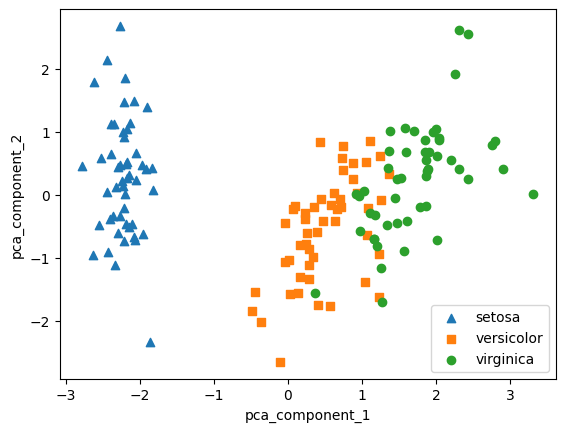

In [9]:
#setosa는 세모 / versicolor는 네모 / virginica는 동그라미 표현
markers = ['^', 's', 'o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

### 변동성 비율
PCA 객체의 explanined_variance_ratio 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

- pca_component_1(첫 번째 PCA 변환 요소)가 전체 변동성의 약 72.9% 차지
- pca_component_2가 22.8% 차지

=> PCA 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명 가능

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


### 원본 데이터 세트 VS PCA 변환 데이터 세트 분류 결과 비교
- Estimator: RandomForestClassifier
- cross_val_score()로 3개의 교차 검증 세트로 정확도 결과 비교

In [11]:
# 원본
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print("원본 데이터 교차 검증 개별 정확도: ", scores)
print("원본 데이터 평균 정확도: ", np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [13]:
# PCA 변환 데이터 세트

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print("PCA 변환 데이터 교차 검증 개별 정확도: ", scores_pca)
print("PCA 변환 데이터 평균 정확도: ", np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도:  0.88


### <결과>
- 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 약 8% 하락
- 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로(50% 감소) 고려하면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음

## 예제 - 신용카드 고객 데이터 세트

### 데이터 로드

In [19]:
import pandas as pd
# header로 의미 없는 첫 행 제거, 그리고 기존 id 제거
df = pd.read_csv("pca_uci_creditcard.csv")
df = df.iloc[0:,1:]

print("데이터 크기:", df.shape)
df.head(3)

데이터 크기: (30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


데이터
- 신용카드 데이터 세트는 30,000개의 레코드와 24개의 속성으로 구성.

- default payment next month → Target (다음달 연체 여부)
    - 연체: 1
    - 정상납부: 0

In [21]:
# PAY_0 → PAY_1로 변경, 'default payment next month' → 'default'로 변경
df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

# Target과 Feature 분리
y_target = df['default']
X_features = df.drop('default', axis=1)

### 속성 간 상관도 확인 및 시각화
- 23개의 속성 데이터 세트 .. 각 속성끼리 상관도가 매우 높음
- 상관도 -> hitmap 시각화

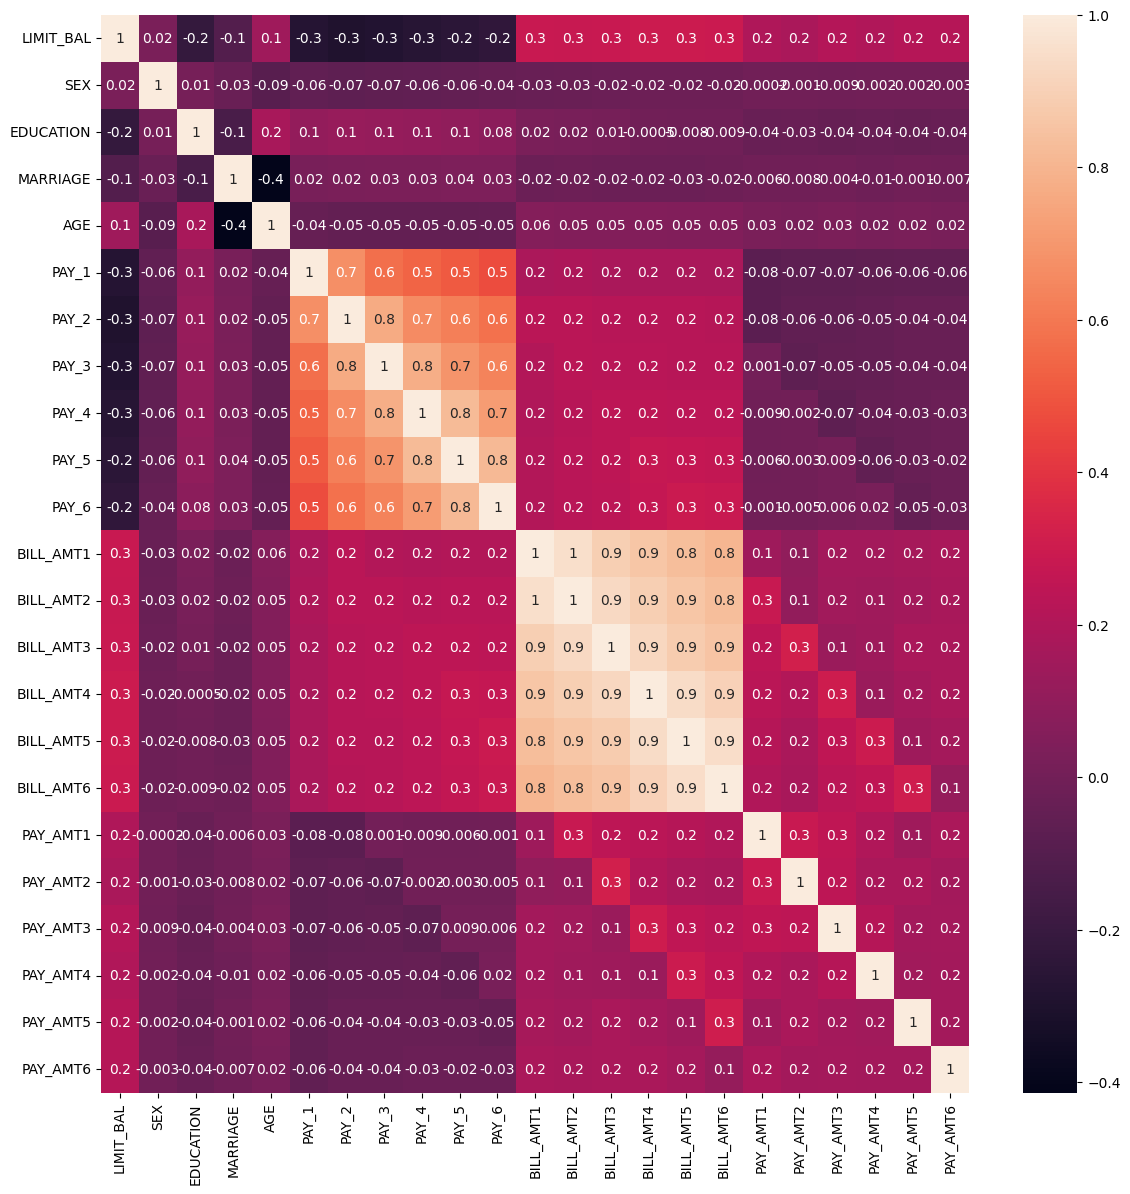

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()

* 📍 BILL_AMT1 ~ BILL_AMT6 간 상관도는 대부분 0.9 이상으로 매우 높음.
* 📍 PAY_1 ~ PAY_6 간 상관도 역시 높음 → PCA로 변동성 요약 가능

### BILL_AMT1~6 → 2개 컴포넌트로 PCA 수행

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성 -> explained_variance_ratio_ 계산을 위해 fit() 호출
# 표준화 후 PCA 수행
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2) # 2차원으로 축소
pca.fit(df_cols_scaled)

print('PCA Component 별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성: [0.90555253 0.0509867 ]


< PCA 결과 >
- 단 2개의 PCA 컴포넌트만으로 6개의 속성의 변동성을 약 95% 설명 가능

### 원본 데이터 세트 VS PCA 변환 데이터 세트의 분류 예측 결과 비교

In [24]:
# 원본
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rfc, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우 개별 Fold 세트별 정확도:', scores)
print('평균 정확도: {:.4f}'.format(np.mean(scores)))


CV=3인 경우 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [25]:
# PCA (6 components) 적용 후 분류 성능 비교
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 원본 데이터 세트 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트로 PCA 변환
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rfc, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {:.4f}'.format(np.mean(scores_pca)))


CV=3인 경우 PCA 변환된 개별 Fold 세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환 데이터 세트 평균 정확도: 0.7969


* ➡️ 평균 정확도 약 80~81%
* ➡️ 원본 대비 1~2% 정도만 성능 저하
* ➡️ 전체 속성의 1/4 수준(6개 컴포넌트)으로 거의 동일한 성능 유지 → PCA의 강력한 차원 축소 효과

# 03 LDA (Linear Discriminant Analysis)

## 예제 - Iris 붓꽃 데이터 LDA 변환

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 데이터 로드 및 스케일링
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)


### LDA 변환 수행
- PCA와 달리 LDA는 지도학습이므로 fit() 시 타깃값 (y) 필요

In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)


(150, 2)


### LDA 변환 결과 시각화

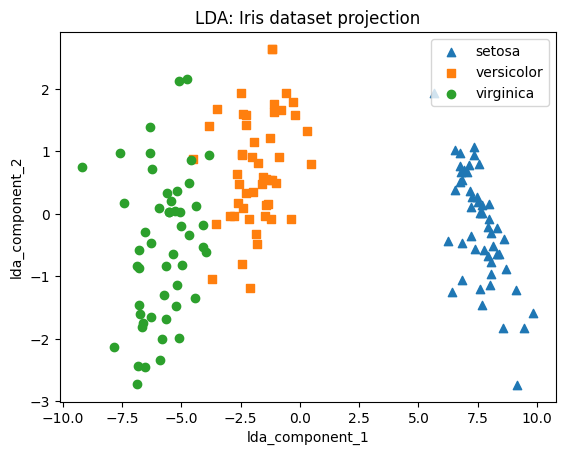

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# LDA 결과를 DataFrame으로 변환
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# 클래스별 산점도 시각화
markers = ['^', 's', 'o']  # setosa, versicolor, virginica

for i, marker in enumerate(markers):
    x_axis = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.title('LDA: Iris dataset projection')
plt.show()

LDA로 변환한 데이터는 PCA로 변환한 데이터와 유사하지만,

좌우 대칭 형태로 나타나는 경우가 많음

이는 클래스 간 분리를 극대화한 투영이기 때문임

# 04 SVD (Singular Value Decomposition)

### 간단 SVD 연산

In [29]:
# 넘파이의 svd 모듈 임퐅
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


a 행렬에 SVD 적용해 U, Sigma, Vt 도출

In [31]:
# SVD 수행
U, Sigma, Vt = np.linalg.svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print("U matrix:\n", np.round(U,3))
print("\nSigma values:\n", np.round(Sigma,3))
print("\nV transpose:\n", np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]

Sigma values:
 [3.423 2.023 0.463 0.079]

V transpose:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


### SVD로 차원 축소

In [33]:
# Sigma 행렬을 대각행렬 형태로 변환
Sigma_mat = np.diag(Sigma)

# 상위 1개 특이값만 이용해 근사 행렬 복원
a_ = np.dot(np.dot(U, Sigma_mat), Vt)

print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [34]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [36]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)

print(U.shape, Sigma.shape, Vt.shape)
print("\nSigma values:\n", np.round(Sigma,3))

(4, 4) (4,) (4, 4)

Sigma values:
 [2.663 0.807 0.    0.   ]


In [38]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]

print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [39]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.randn(6,6)
print('원본행렬: \n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\n Sigma값 행렬: ', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원: ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬: ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # Out of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬: \n', matrix_tr)

원본행렬: 
 [[-0.21203317 -0.28492917 -0.57389821 -0.44031017 -0.33011056  1.18369457]
 [ 1.61537293  0.36706247 -0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855 -0.79041516 -0.73272161]
 [ 0.08774382 -0.500286    0.50411444  0.6074061   1.16644959  0.82442442]
 [-3.0867246   1.16434226  1.08265161  0.48579599 -1.23488428 -1.85888172]
 [ 0.48815628  0.385895   -0.22652149  0.10767116  1.71999521  1.04079381]]

 분해 행렬 차원:  (6, 6) (6,) (6, 6)

 Sigma값 행렬:  [4.71896376 2.9321352  2.75529766 1.57959761 0.95123351 0.13457603]

Truncated SVD 분해 행렬 차원:  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬:  [1.57959761 2.75529766 2.9321352  4.71896376]

Truncated SVD로 분해 후 복원 행렬: 
 [[-0.147862   -0.40791222 -0.42615025 -0.27407471 -0.41921318  1.20891792]
 [ 1.64383707  0.34888961  0.03830529  0.68566214  1.67399193 -1.31081927]
 [ 0.41137232 -0.23679269  1.43548624 -1.93093361 -0.80649743 -0.73270593]
 [ 0.04157404 -0.01719873  0.25559082  0.29563299  1.2

k=1로 축소했을 때도 원본 행렬의 주요 패턴을 상당히 보존

특이값이 작을수록 데이터의 노이즈나 세부 정보를 의미

## 사이킷런 TruncatedSVD 클래스를 이용한 변환

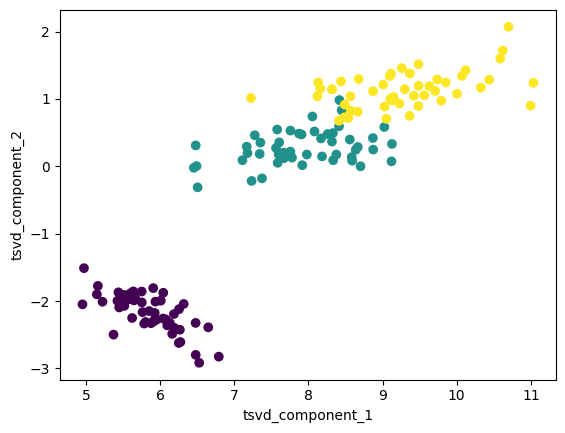

In [1]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 로드 및 표준화
iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(iris_tsvd[:, 0], iris_tsvd[:, 1], c=iris.target)
plt.xlabel('tsvd_component_1')
plt.ylabel('tsvd_component_2')
plt.show()

2.3421889427943655e-15
-6.938893903907228e-18


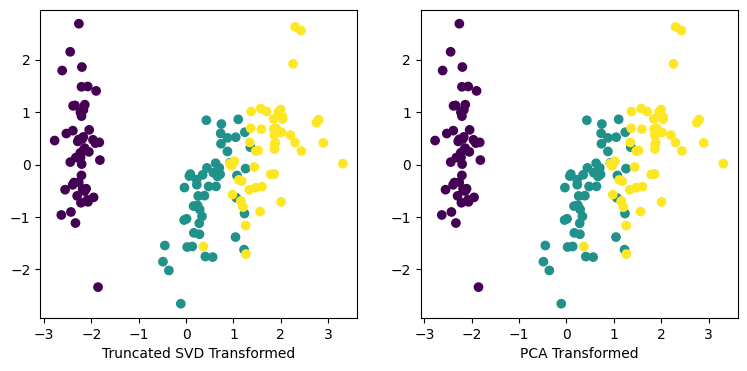

In [7]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(iris_tsvd[:, 0], iris_tsvd[:, 1], c=iris.target)
ax2.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris.target)
ax1.set_xlabel('Truncated SVD Transformed')
ax2.set_xlabel('PCA Transformed')

print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

# 05 NMF (Non-Negative Matrix Factorization)

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


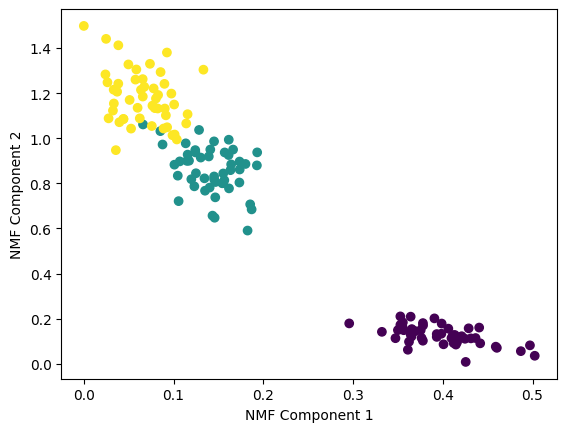

In [8]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 컴포넌트로 NMF 변환
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()